## Question 3

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import time

### Generating a random dataset
A dataset for binary classification with classes $y=0$ and $y=1$\
Distributed dataset Normally for both classes.
$$P(x|y=0)=\mathcal{N}(\mu_{1},{\sigma_{1}}^{2})$$
$$P(x|y=1)=\mathcal{N}(\mu_{2},{\sigma_{2}}^{2})$$
Green Class with y=0\
$\mu_{1}=0, {\sigma}_1=2$\
Red Class with y=1\
$\mu_{1}=7, {\sigma}_2=2$


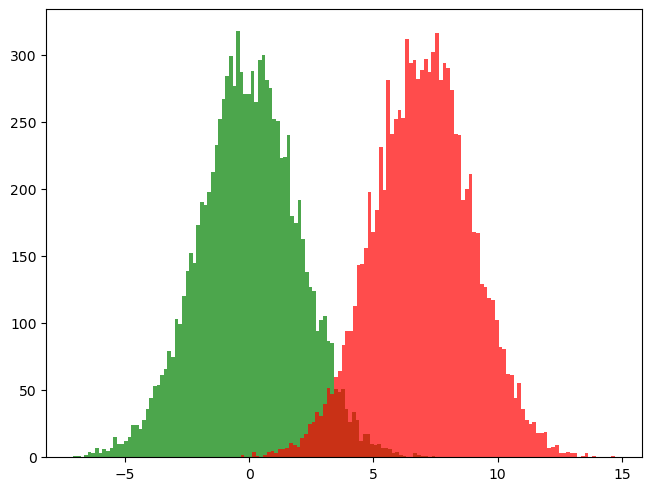

In [2]:
#class 1~N(0,2)
#class 2~N(7,2)
np.random.seed(7)
x1=np.random.normal(0,2,10000)
x2=np.random.normal(7,2,10000)
m=len(x1)
y1=np.array(0)
fig,ax=plt.subplots(1,layout="constrained")
ax.hist(x1,bins=100,color='green',alpha=0.7)
ax.hist(x2,bins=100, color='red', alpha=0.7)
plt.show()


x=np.concatenate((x1,x2))
y1=np.zeros(m)
y2=np.ones(m)
y=np.concatenate((y1,y2))


### Logistic Regression
the hypothesis function for logistic regression is the sigmoid function
$$h_{\theta}(x)=\frac{1}{1+e^{-{\theta}^TX}}$$
For binary classification y=0 or 1
$$P(y=1|x;\theta)=h_{\theta}(x)$$
$$P(y=0|x;\theta)=1-h_{\theta}(x)$$
which can further be condensed into 
$$P(y|x;\theta)={\big(h_{\theta}(x)\big)}^{y}{\big({1-h_{\theta}(x)}\big)}^{1-y}$$

### Maximum Likelihood Estimation

$$ L(\theta)=\prod_{i=1}^{n}P(y^{i}|x^{i};\theta)$$
log-likelihood function

$$l(\theta)=log(L(\theta))=\sum_{i=1}^{n}\Big[y^{i}log(h_{\theta}(x^{i}))+(1-y^{i})log(1-h_{\theta}(x^{i}))\Big]$$

In [11]:
def hypothesis(weight,x,y):
    
    sigmoid=[]
    for i in range(2*m):
        z=x[i]*weight
        sigmoid.append(1/(1+math.exp(-z)))
            
    sigmoid=np.array(sigmoid)
    return sigmoid

def gradient(weight,x,y):
    gr=np.dot(x,(hypothesis(weight,x,y)-y))/(2*m)
    return gr

## Optimal solution of theta
The log likelihood function should find a maximum value for a $\theta$  for which we will use two methods
### Batch-Gradient Descent Method
$${\theta}_j:={\theta}_j+\alpha\frac{d}{d\theta}l(\theta
)$$
where 
$$\frac{d}{d\theta}l(\theta)=x^i(y-h)$$

time taken to complete 200 epochs : ((14.209085941314697, 3), 's')


0.41452913771581745

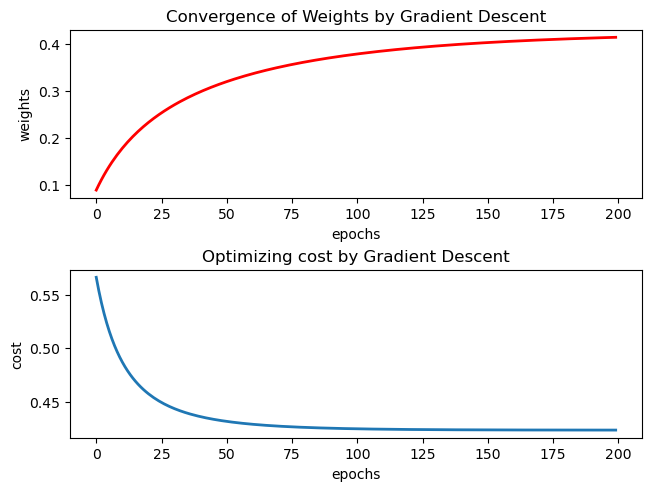

In [33]:
start = time.time()

# Cost function 
def costFunc(w,x,y):
    np.dot(y,np.log(hypothesis(w,x,y)))
    cost=(-np.dot(y,np.log(hypothesis(w,x,y)))-np.dot((1-y),(np.log(hypothesis(w,x,y)))))/(2*m)
    return cost

def GradientDescent(epochs,x,y):
    np.random.seed(7)
    al=0.01     #learning rate alpha
    weight=np.random.rand() #initialising random weight between 0,1
    weights=[]  # weight matrix
    cost_GD=[]  # cost matrix
    
    for i in range(epochs):
        
        weight-=al*(gradient(weight,x,y))
        weights.append(weight)
        cost=costFunc(weight,x,y)
        cost_GD.append(cost)
    
        
    #plotting covnvergence of weights
    
    fig,ax=plt.subplots(2,1,layout="constrained")
    ax[0].set_title("Convergence of Weights by Gradient Descent")
    ax[0].set_xlabel("epochs")
    ax[0].set_ylabel("weights")
    ax[0].plot(weights, color="red", linewidth=2)    
    
    #plotting cost 
  
    ax[1].set_title("Optimizing cost by Gradient Descent")
    ax[1].set_xlabel("epochs")
    ax[1].set_ylabel("cost")
    ax[1].plot(cost_GD, linewidth=2)
    
    a=(time.time() - start, 3), 's'
    print("time taken to complete",epochs,"epochs :",a )
    return (weight)
    

GradientDescent(200,x,y)

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   1.,   0.,   0.,   1.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   2.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,
          0.,   0.,   2.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   1.,   1.,   1.,   0.,   0.,   0.,   1.,
          2.,   0.,   1.,   1.,   0.,   0.,   0.,   3.,   0.,   0.,   0.,
          0.,   1.,   1.,   1.,   0.,   1.,   1.,   1.,   1.,   0.,   0.,
          1.,   2.,   0.,   0.,   0.,   1.,   0.,   0.,   4.,   1.,   3.,
          2.,   1.,   1.,   0.,   2., 

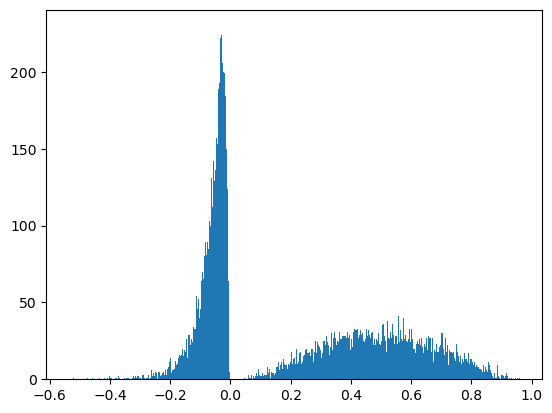

In [6]:
plt.hist(hypothesis(0.425839709896386,x,y)-y,bins=1000)

### Fisher Scoring (Newton's Method)

For a function $f(\theta)$\
to find $\theta $ where $f(\theta)=0$


$${\theta}^{t+1}:={\theta}^t-\frac{f({\theta}^{t})}{f'({\theta}^t)}$$
Run iterations until $\theta$ converges starting from ${\theta}^{0}$

therefore to find maximum likelihood we will use newtons's method for $l'(\theta)=0$
$${\theta}^{t+1}:={\theta}^t-\frac{l'({\theta}^{t})}{l''(\theta^t)}$$

$$l'(\theta)=\frac{1}{n}\sum_{i=1}^{n}\Bigg(\frac{1}{1+e^{-\theta^TX^i}}-y^i\Bigg)X^i$$

0.4198563571982066

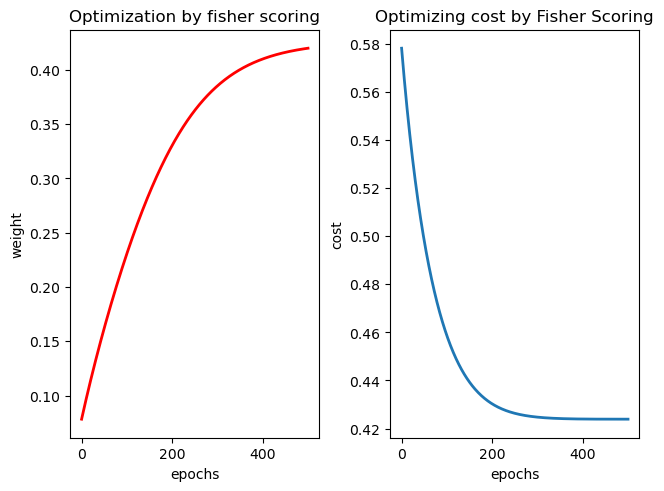

In [35]:
def fisherScoring(epochs,x,y):
    
    np.random.seed(7)
    weight=np.random.rand() #initialising random weight between 0,1
    weights_fs=[]  #weight array 
    al=0.01 #learning rate alpha
    cost_FS=[]
    
    
    for i in range(epochs):
        grad=gradient(weight,x,y)
        sig=hypothesis(weight,x,y)
        
    
        hessian=(np.dot(((1-sig)*sig),(x*x)))/(2*m) #hessian l''(theta)
        weight-=al*(grad)/(hessian) #newton method
        weights_fs.append(weight) 
        
        cost=costFunc(weight,x,y)
        cost_FS.append(cost)
        
    #plotting convergence of weights 
    fig,ax=plt.subplots(1,2,layout="constrained")
    ax[0].set_title('Optimization by fisher scoring')
    ax[0].set_xlabel('epochs')
    ax[0].set_ylabel('weight')
    ax[0].plot(weights_fs, color='red', linewidth=2)
    
    #plotting cost 
  
    ax[1].set_title("Optimizing cost by Fisher Scoring")
    ax[1].set_xlabel("epochs")
    ax[1].set_ylabel("cost")
    ax[1].plot(cost_FS, linewidth=2)
    
    return weight 
    
fisherScoring(500,x,y)

## Question 4

### a)  The sample size n is extremely large, and the number of predictors p is small.
Flexible statistical learning method will perform better as the sample size is extremely large,\
the flexible model will eventually figure out the true distribution. The bias and variance will then be optimal.

### b) The number of predictors p is extremely large, and the number of observations n is small.
Flexible learning method might not perform well in this case because its very prone to overfitting as the dataset given is small, also model wont be able to find true distribution with given dataset, hence bias will be low but variance will increase. Its better to take assumptions about the dataset,hence an inflexible method would suite better. 

### c) The relationship between the predictors and response is highly non-linear.
Inflexible learning method wont be able to undertake highly non linear assumptions, so Flexible method might perform well on this dataset
